## The Sparks Foundation GRIP August21
### Data Science and Business Analytics
### Task 6 : Prediction using Decision Tree Algorithm
### Author : Vaishali Lonkar

Creating the Decision Tree classifier and visualizing it graphically

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
class_count = 3
plot_colors = 'brg'
markers = 'ovs'
plot_res = 0.01

In [3]:
iris = load_iris()

(0.5, 7.390000000000006, -0.4, 2.9900000000000033)

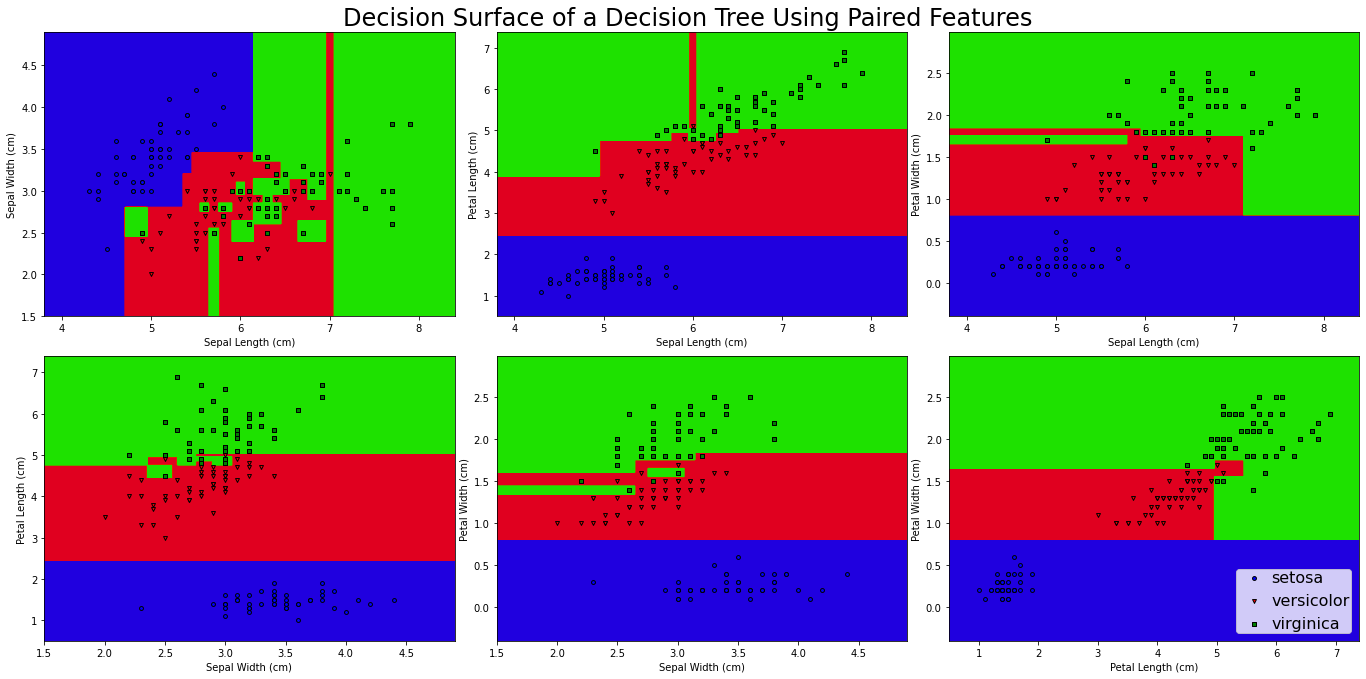

In [4]:
plt.figure(figsize=(20,10))
models = []
for pair_index, pair in enumerate([[0, 1], [0, 2], [0, 3], 
                                           [1, 2], [1, 3], 
                                                   [2, 3] ]):
    X, y = iris.data[:, pair] , iris.target
    model = DecisionTreeClassifier().fit(X, y)
    models.append(model)
    plt.subplot(2, 3, pair_index + 1)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, 
                                   x_max, 
                                   plot_res),
                         np.arange(y_min, 
                                   y_max, 
                                   plot_res) )
    
    plt.tight_layout(h_pad = 0.5, 
                     w_pad = 0.5, 
                       pad = 4.0 )
    Z = model.predict(np.c_[xx.ravel(), 
                            yy.ravel() ])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.brg)
    
    plt.xlabel(iris.feature_names[pair[0]].title()[0:-4] + iris.feature_names[pair[0]][-4:])
    plt.ylabel(iris.feature_names[pair[1]].title()[0:-4] + iris.feature_names[pair[1]][-4:])
    
    for i, color, marker in zip(range(class_count), plot_colors, markers):
        index = np.where(y == i)
        plt.scatter(X[index, 0], 
                    X[index, 1], 
                    c = color,
                    marker = marker,
                    label = iris.target_names[i],
                    cmap = plt.cm.brg, 
                    edgecolor = 'black', 
                    s = 15                       )
plt.suptitle('Decision Surface of a Decision Tree Using Paired Features',
             size = 24                                                   )

plt.legend(loc = 'lower right',
           fontsize = 16,
           borderpad = 0.1, 
           handletextpad = 0.1 )

plt.axis("tight")

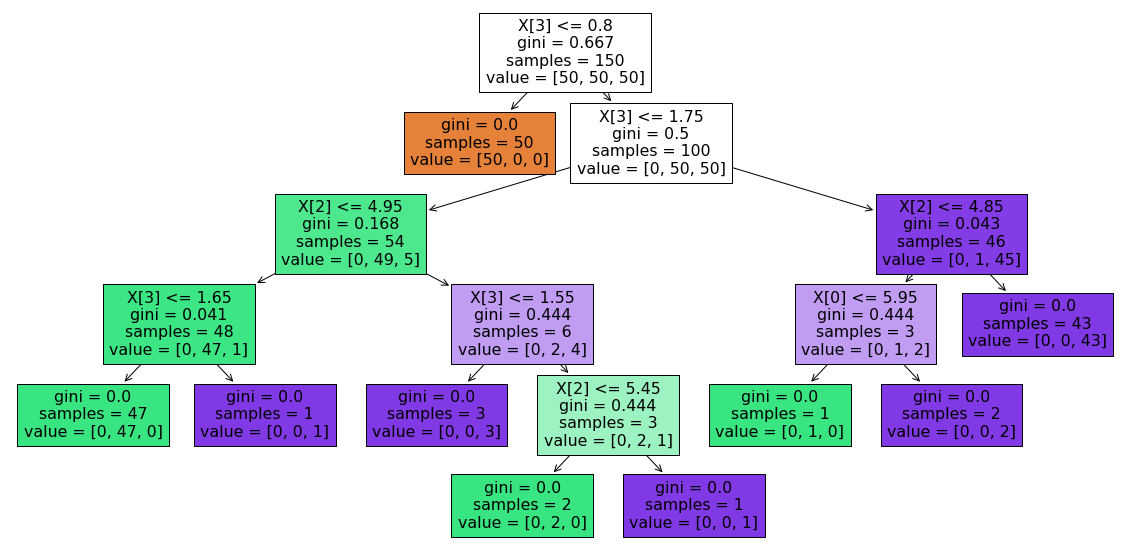

In [5]:
model_all_params = DecisionTreeClassifier().fit(iris.data, iris.target)
plt.figure(figsize = (20,10))
plot_tree(model_all_params, 
          filled=True      )
plt.show()

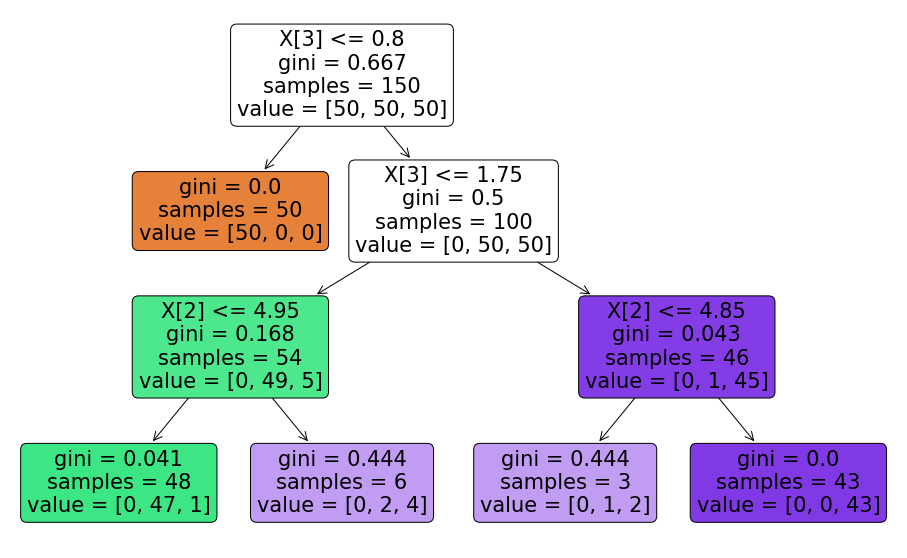

In [6]:
model_all_params_max_depth_3 = DecisionTreeClassifier(max_depth = 3).fit(iris.data, iris.target)
plt.figure(figsize = (16,10))
plot_tree(model_all_params_max_depth_3,
          rounded = True,
          filled = True                )
plt.show()

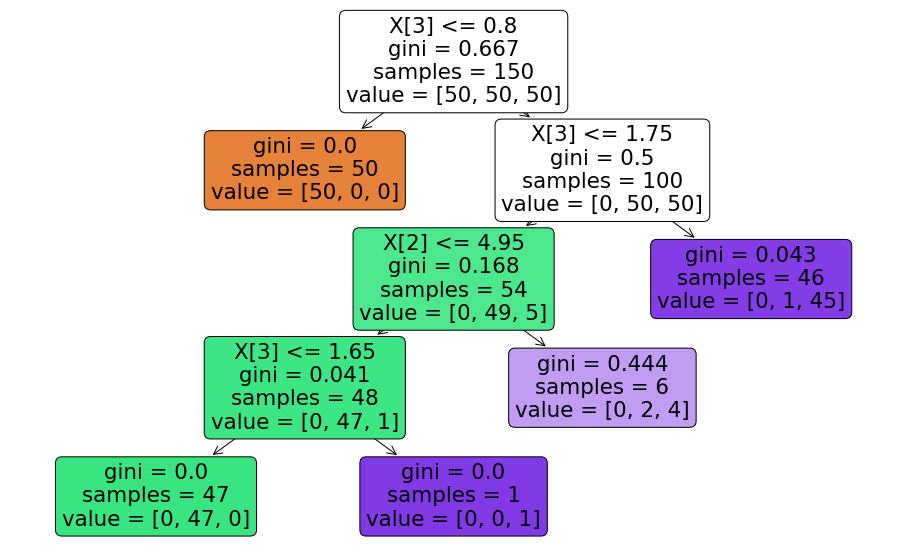

In [7]:
model_all_params_min_imp_dec_001 = DecisionTreeClassifier(min_impurity_decrease = 0.01).fit(iris.data, iris.target)
plt.figure(figsize = (16,10))
plot_tree(model_all_params_min_imp_dec_001,
          rounded = True,
          filled = True                )
plt.show()

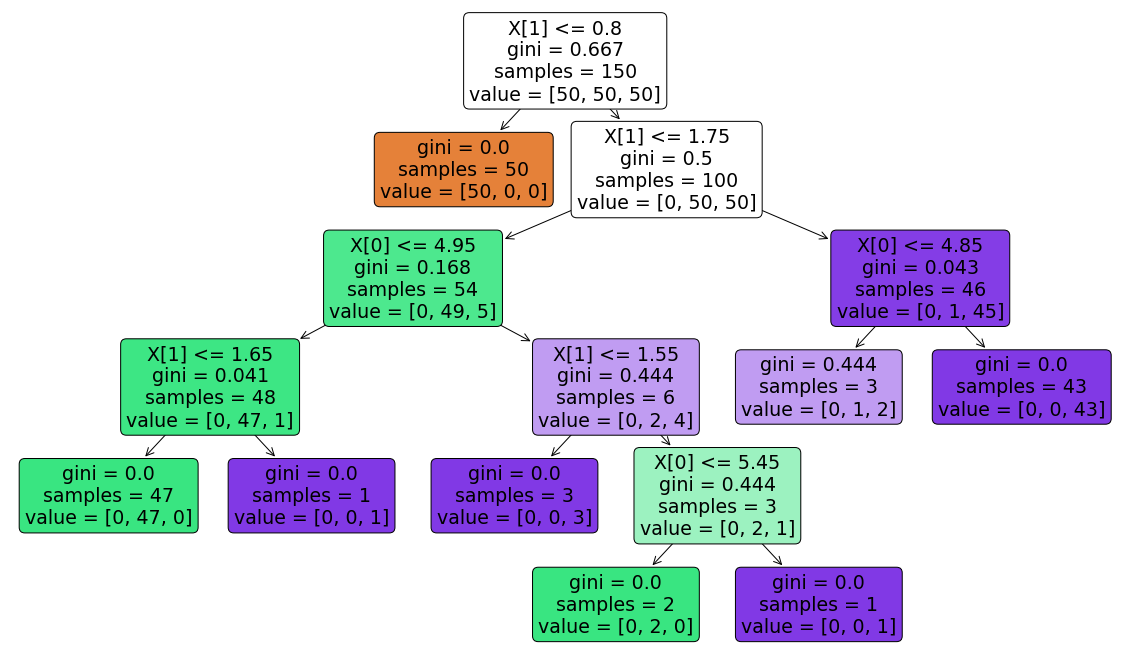

In [8]:
plt.figure(figsize = (20,12))
plot_tree(models[5],
          rounded = True,
          filled = True  )
plt.show()

# Thank you!!!